# <center>AgriTech</center>

## Importing Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import seaborn as sns

## Importing DataSet

In [63]:
crop_df = pd.read_csv("Crop.csv")
print(crop_df.head())
print(crop_df.tail())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
        N   P   K  temperature   humidity        ph    rainfall   label
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee


#### 

   <table>
<center><tr><td>N</td><td> ratio of Nitrogen content in soil </td></tr>
<tr><td>P</td><td> ratio of Phosphorous content in soil </td></tr>
<tr><td>K</td><td>ratio of Potassium content in soil </td></tr>
<tr><td>temperature</td><td> temperature in degree Celsius </td></tr>
<tr><td>humidity</td><td>relative humidity in % </td></tr>
<tr><td>ph</td><td>ph value of the soil</td></tr>
<tr><td>rainfall</td><td>rainfall in mm</td></tr></center>
    </table>

## Preprocessing and Visualisation

In [24]:
crop_df.shape

(2200, 8)

In [25]:
crop_df.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

In [26]:
crop_df.duplicated().sum()

0

In [27]:
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [28]:
crop_df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [29]:
crop_df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [30]:
crop_df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

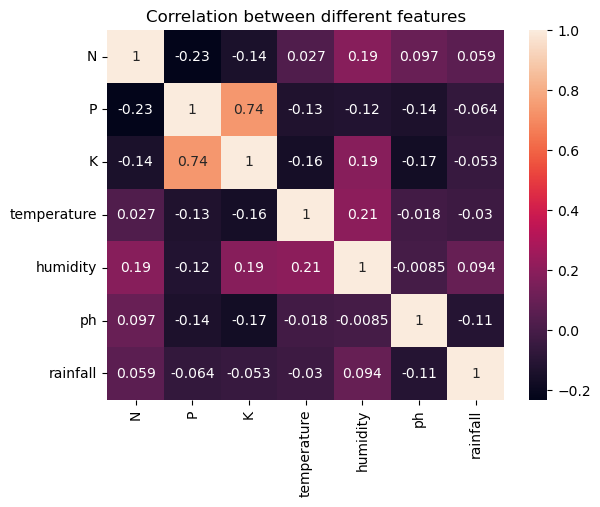

In [31]:
sns.heatmap(crop_df.corr(), annot=True)
plt.title('Correlation between different features')
plt.show()

In [32]:
crop_mean = pd.pivot_table(crop_df,index=['label'],aggfunc='mean')
crop_mean.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


In [33]:
crop_min = pd.pivot_table(crop_df,index=['label'],aggfunc='min')
crop_min.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,195,0,120,90.025751,5.514253,100.117344,21.036527
banana,45,80,70,75.031933,5.505394,90.109781,25.010185
blackgram,15,20,55,60.065349,6.500145,60.417903,25.097374
chickpea,75,20,55,14.258040,5.988993,65.113656,17.024985
coconut,25,0,5,90.017345,5.501580,131.090008,25.008724


In [34]:
crop_max = pd.pivot_table(crop_df,index=['label'],aggfunc='max')
crop_max.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,205,40,145,94.920481,6.499227,124.983162,23.996862
banana,55,120,95,84.978492,6.490074,119.847970,29.908885
blackgram,25,60,80,69.961000,7.775306,74.915595,34.946616
chickpea,85,60,80,19.969789,8.868741,94.781896,20.995022
coconut,35,40,30,99.981876,6.470466,225.632366,29.869083


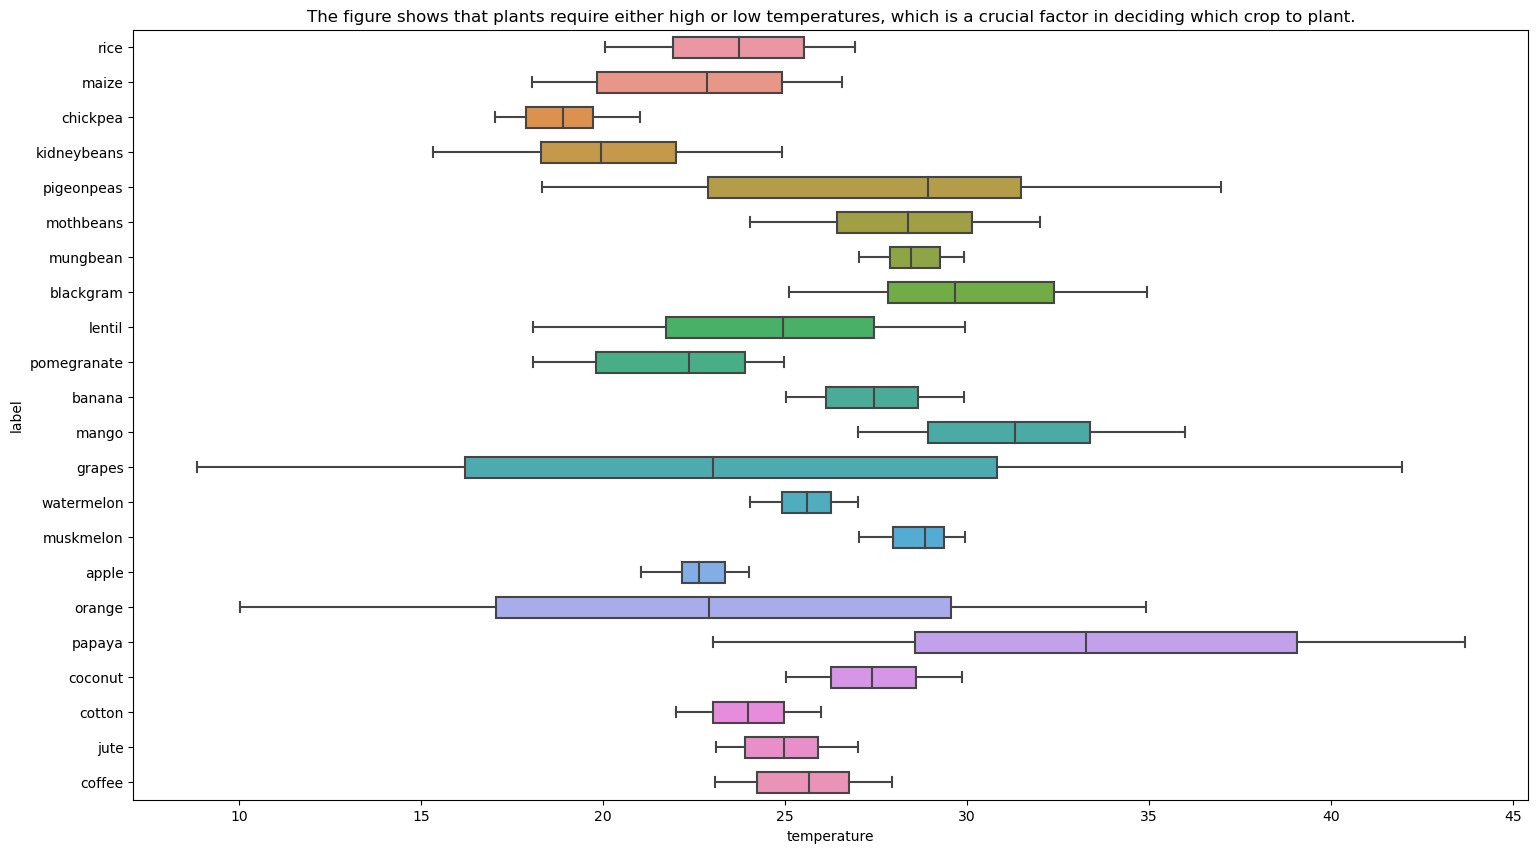

In [35]:
plt.figure(figsize=(18,10))
print()
plt.title("The figure shows that plants require either high or low temperatures, which is a crucial factor in deciding which crop to plant.")
sns.boxplot(x="temperature", y="label", data=crop_df, whis=[0, 100], width=.6 , orient="h")
plt.show()

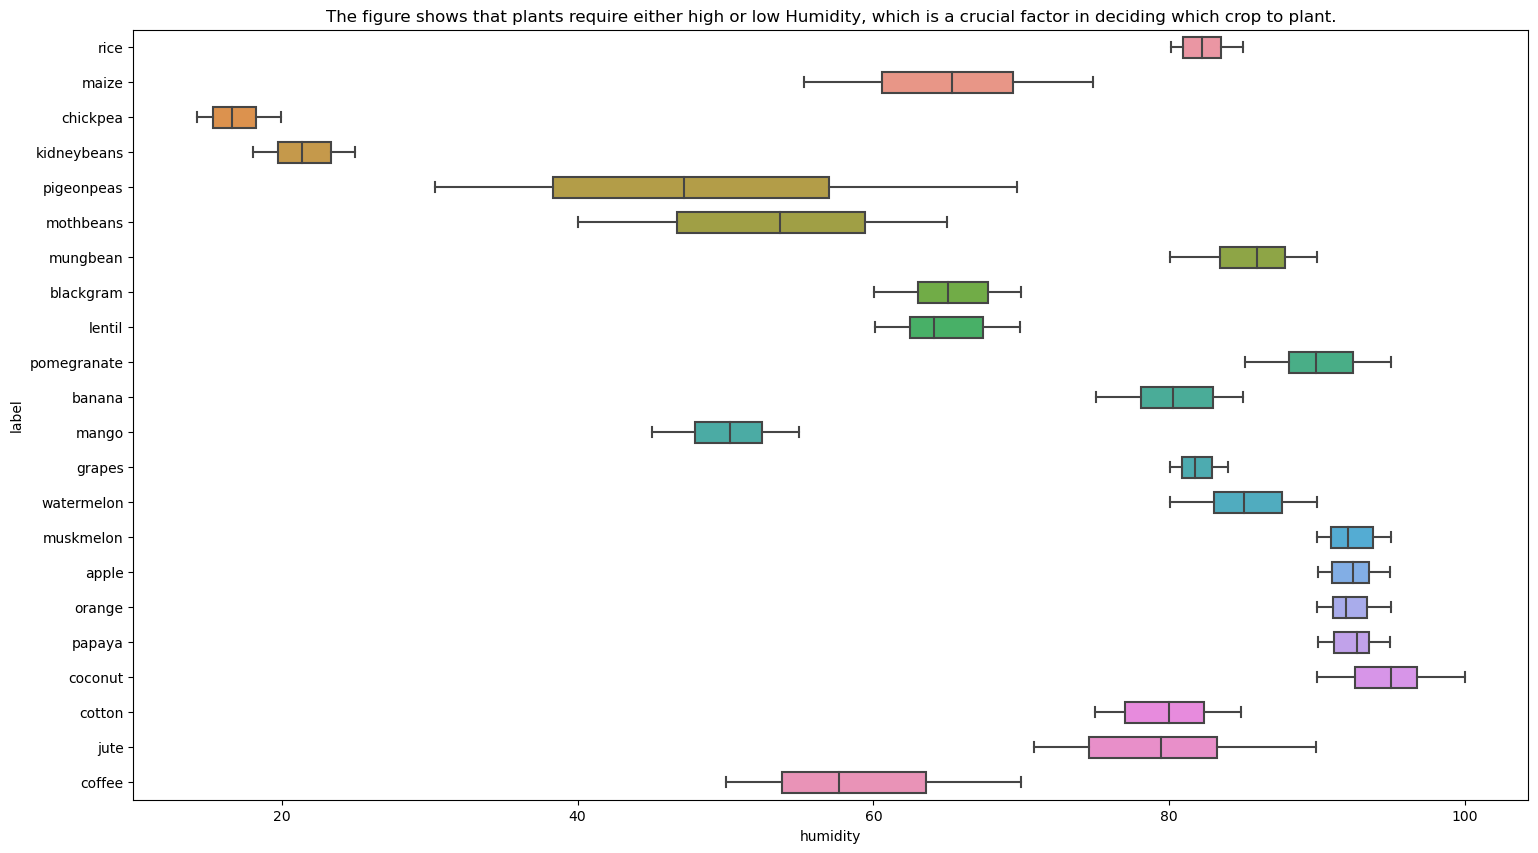

In [36]:
plt.figure(figsize=(18,10))
print()
plt.title("The figure shows that plants require either high or low Humidity, which is a crucial factor in deciding which crop to plant.")
sns.boxplot(x="humidity", y="label", data=crop_df, whis=[0, 100], width=.6 , orient="h")
plt.show()

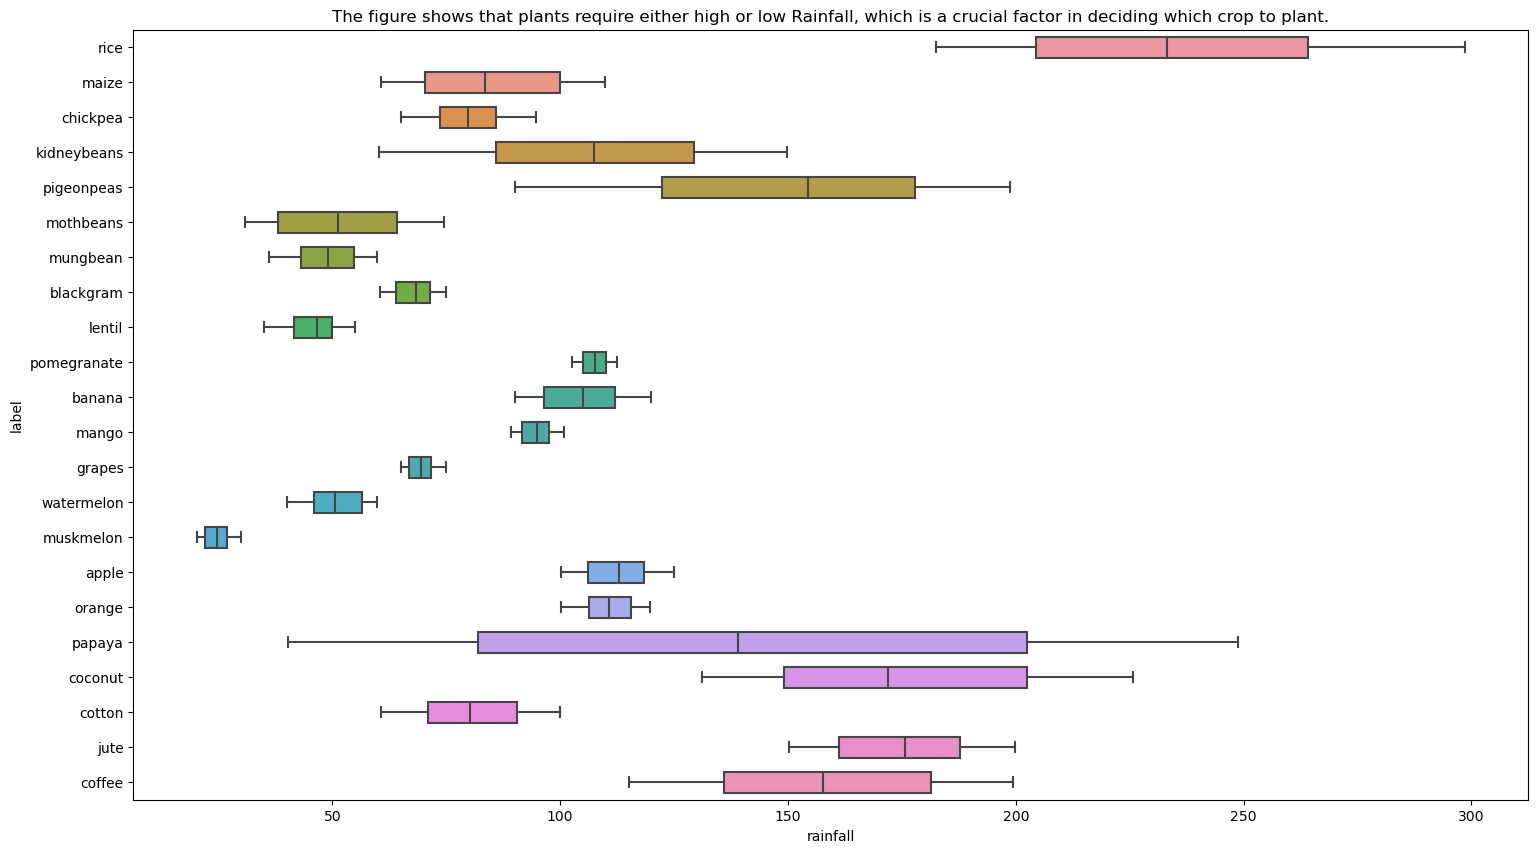

In [37]:
plt.figure(figsize=(18,10))
print()
plt.title("The figure shows that plants require either high or low Rainfall, which is a crucial factor in deciding which crop to plant.")
sns.boxplot(x="rainfall", y="label", data=crop_df, whis=[0, 100], width=0.6 , orient="h")
plt.show()

In [38]:
### Lets understand which crops can only be Grown in Summer Season, Winter Season and Rainy Season
print("Crops grown in Summer season")
summer_crops=crop_df[(crop_df['temperature'] > 30) & (crop_df['humidity'] > 50)]['label'].unique()
print(summer_crops)
print("Crops grown in Winter season")
winter_crops=crop_df[(crop_df['temperature'] < 20) & (crop_df['humidity'] < 35)]['label'].unique()
print(winter_crops)
print("Crops grown in Rainy season")
rainy_crops=crop_df[(crop_df['rainfall'] > 200) & (crop_df['humidity'] > 30)]['label'].unique()
print(rainy_crops)

Crops grown in Summer season
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
Crops grown in Winter season
['chickpea' 'kidneybeans' 'pigeonpeas']
Crops grown in Rainy season
['rice' 'papaya' 'coconut']


### The notebook's file size is large since the above plot is taking more memory so it is plotted in another file 👇(Plots.ipynb)

In [39]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
df_numeric_col=crop_df.iloc[:,:7]
fig = make_subplots(rows=1, cols=len(df_numeric_col.columns))
features_num = df_numeric_col.columns
print(features_num)
for i in range(0, len(features_num)):
    trace=go.Box(y=crop_df[features_num[i]], name=features_num[i])
    fig.append_trace(trace, row=1, col=i+1)
fig.show()

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')


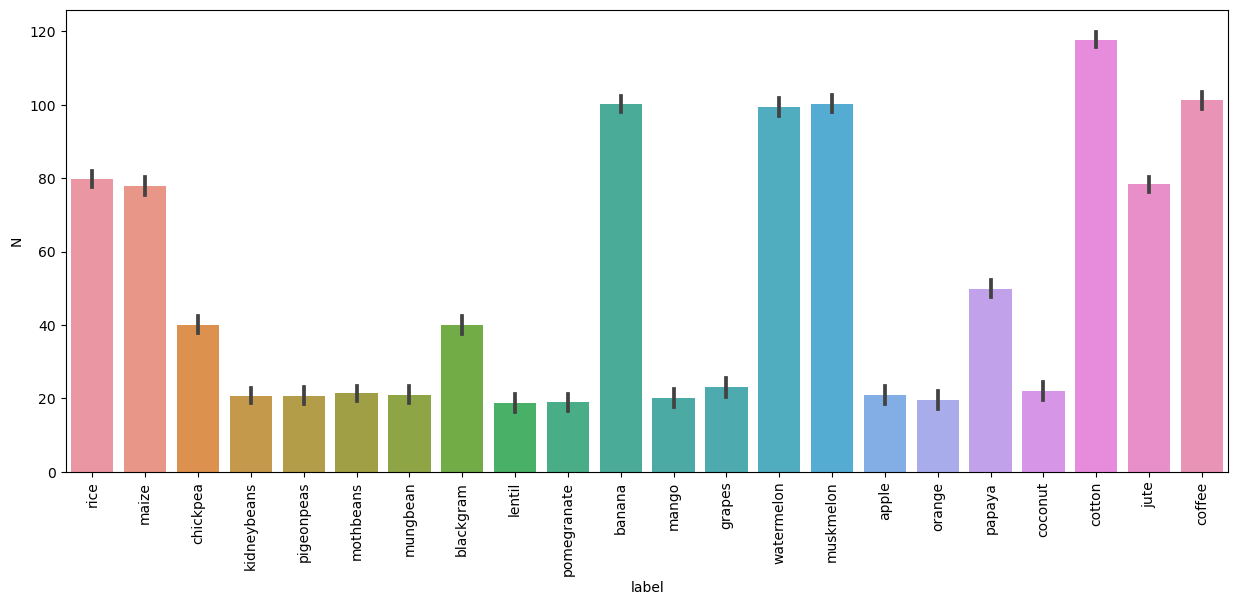

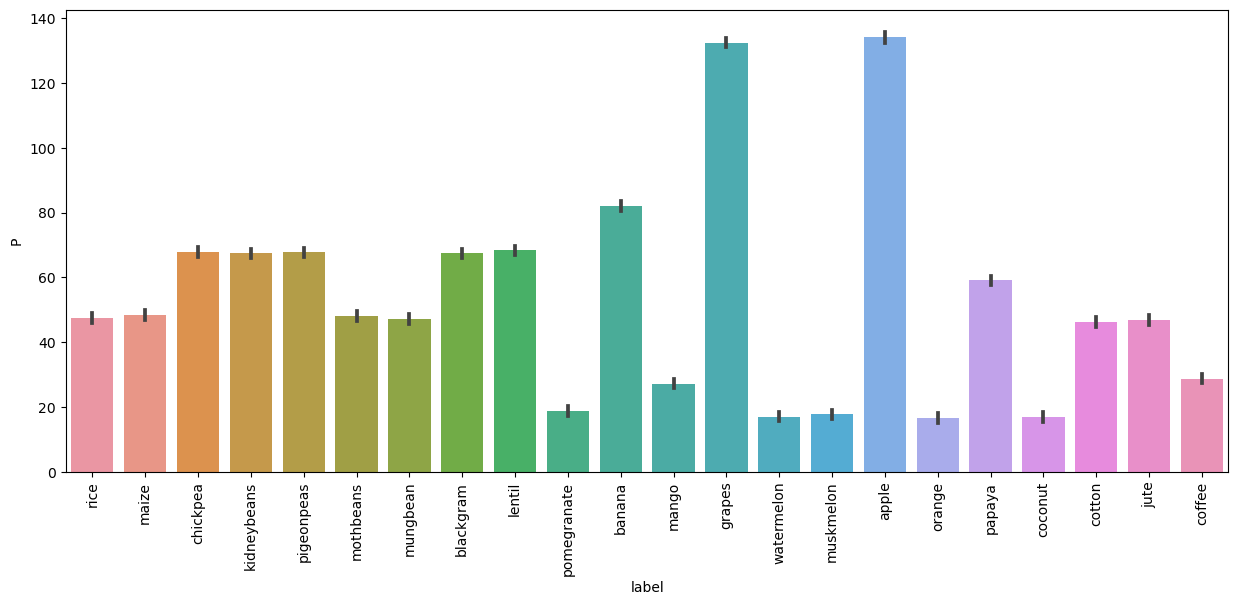

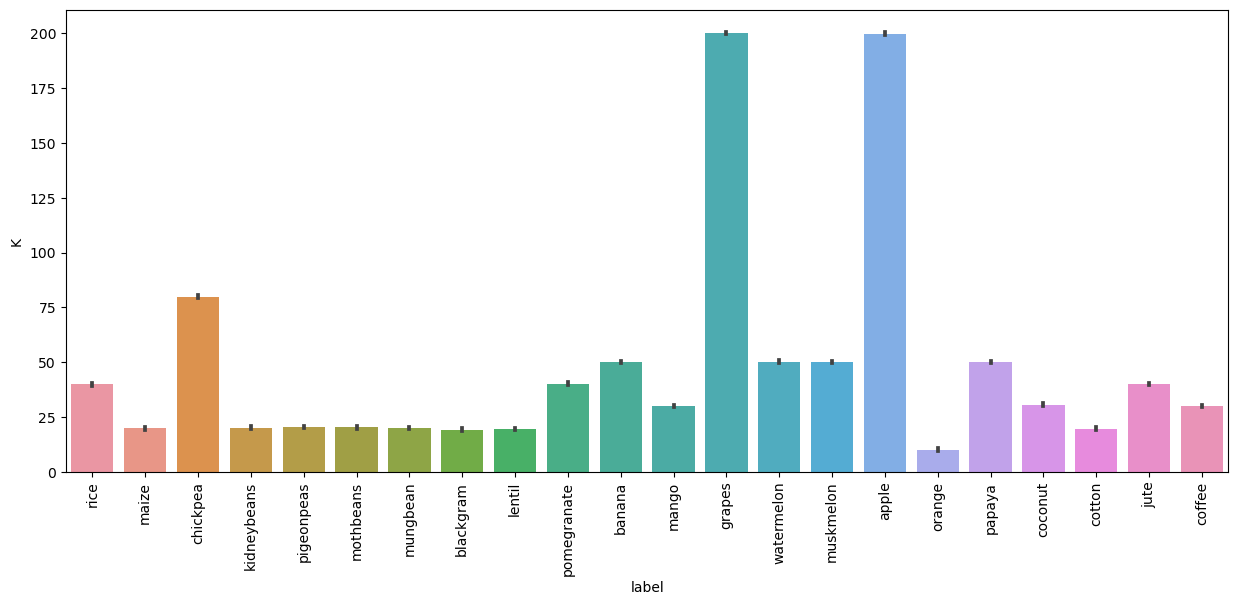

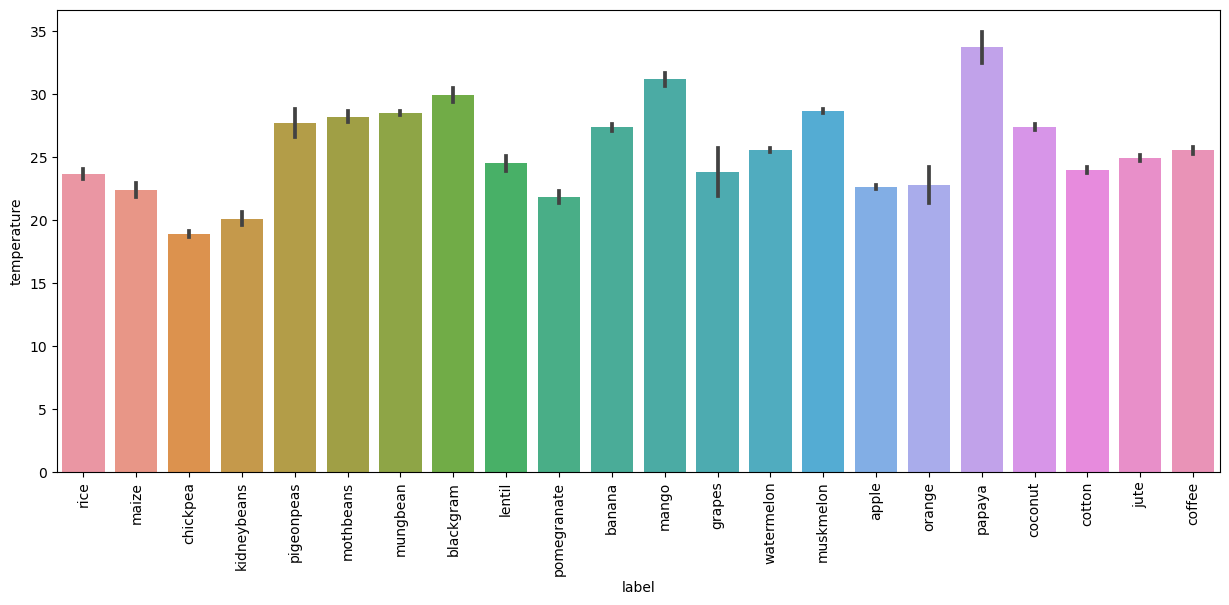

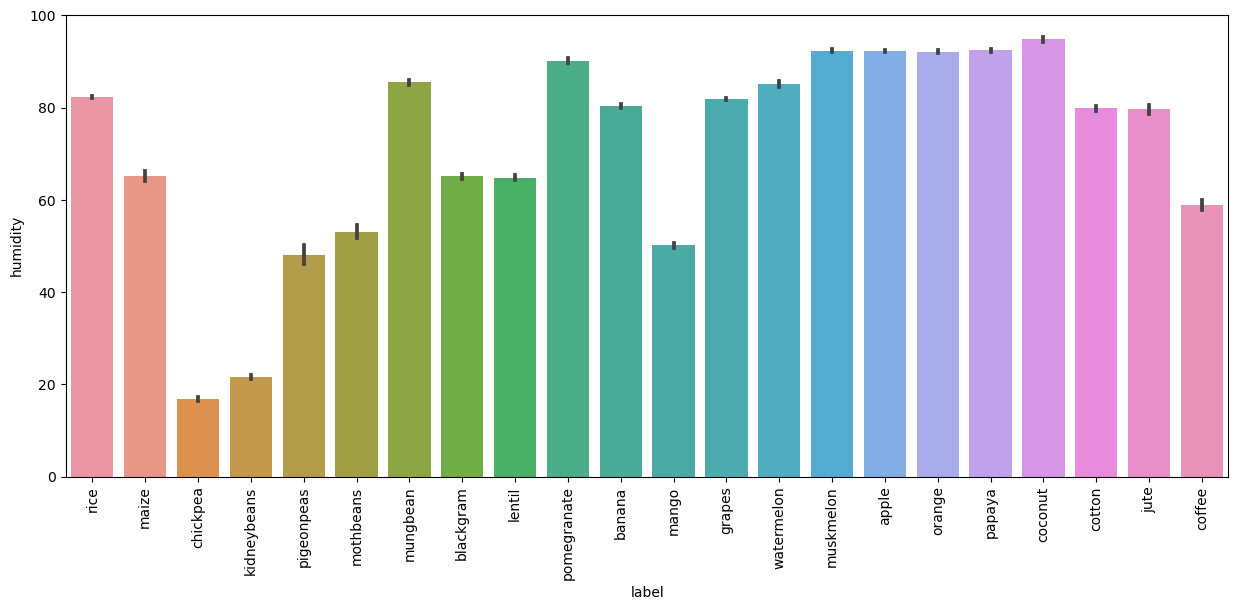

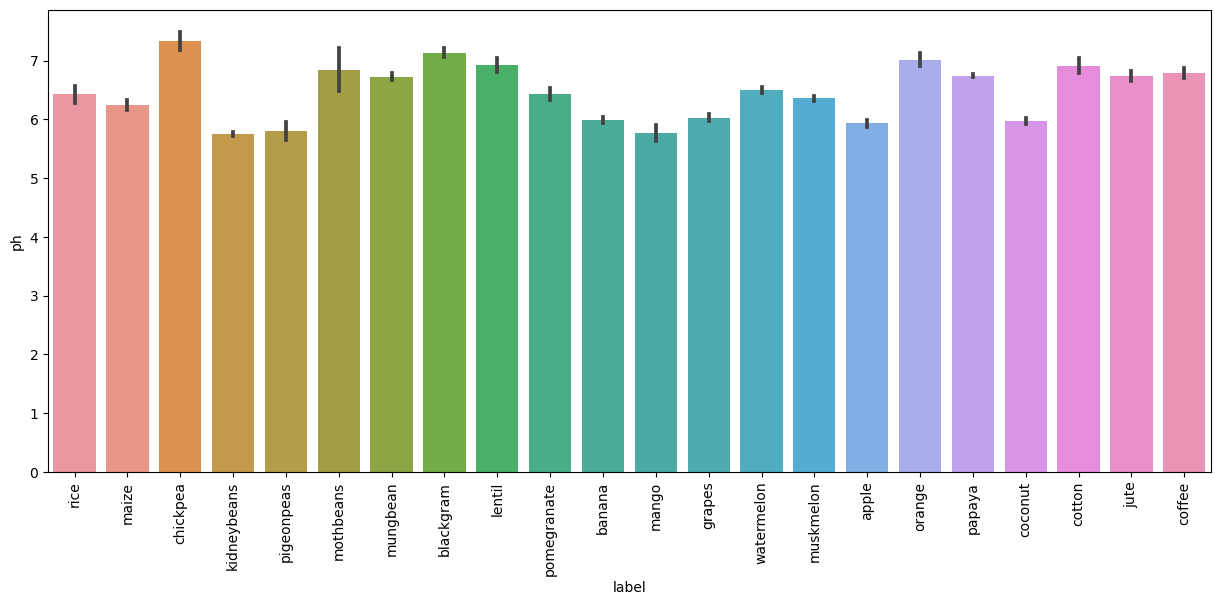

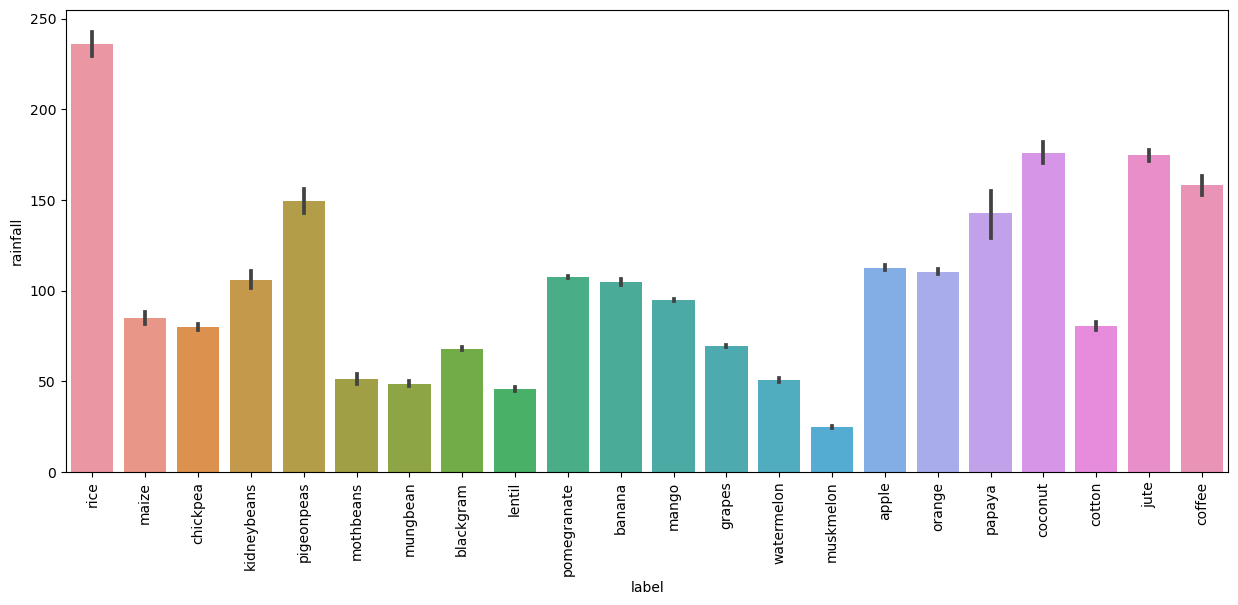

In [40]:
for i in crop_df.columns:
    if i!="label":
        plt.figure(figsize=(15,6))
        sns.barplot(y = str(i), x = 'label', data=crop_df)
        plt.xticks(rotation = 90)
        plt.show()

### The notebook's file size is large since the above plot is taking more memory so it is plotted in another file 👇(Plots.ipynb)

In [41]:
total_features = crop_df.columns
plt.figure(figsize=(50, 40))
for i in range(0, len(total_features)-1):
    fig = px.pie(crop_df, values=total_features[i], names='label', title="Composition of crops with "+total_features[i])
    fig.show()

<Figure size 5000x4000 with 0 Axes>

## Encoding

In [42]:
before_encoding =crop_df['label'].copy().unique()
print(before_encoding)

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [43]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the label column
crop_df['label'] = label_encoder.fit_transform(crop_df['label'])
# Get unique categories and their encoded values
after_encoding = crop_df['label'].unique()
after_encoding
# print(after_encoding)

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [44]:
# Print the mapping
crop_dict = dict(zip(after_encoding,before_encoding))
print(crop_dict)
crop_df['label'].value_counts()

{20: 'rice', 11: 'maize', 3: 'chickpea', 9: 'kidneybeans', 18: 'pigeonpeas', 13: 'mothbeans', 14: 'mungbean', 2: 'blackgram', 10: 'lentil', 19: 'pomegranate', 1: 'banana', 12: 'mango', 7: 'grapes', 21: 'watermelon', 15: 'muskmelon', 0: 'apple', 16: 'orange', 17: 'papaya', 4: 'coconut', 6: 'cotton', 8: 'jute', 5: 'coffee'}


20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: label, dtype: int64

## Testing and Training

In [45]:
from sklearn.model_selection import train_test_split
x=crop_df.drop('label',axis=1)
y=crop_df['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)

(1760, 7)
(440, 7)


In [46]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# sc.fit(x_train)
# x_train = sc.transform(x_train)
# x_test = sc.transform(x_test)
# print(x_train,'\n',x_test)

## Model  Training

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

F1 Score for Decision tree Classifier 0.9883519257292412


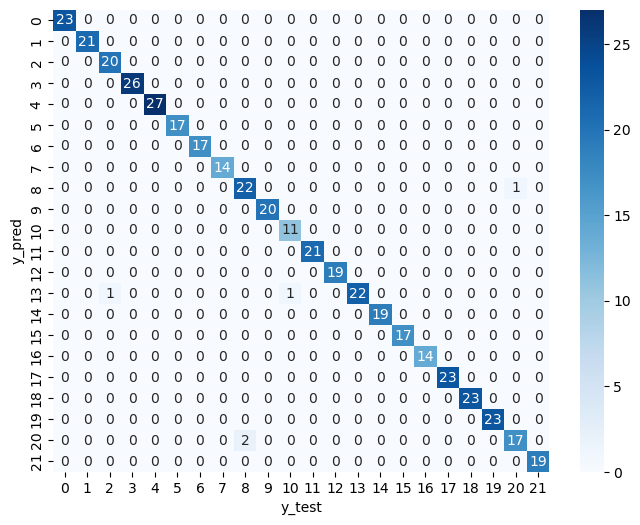

In [48]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("F1 Score for Decision tree Classifier",f1_score(y_test,y_pred,average='macro'))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

F1 Score for Random Forest Classifier 0.9926374055074331


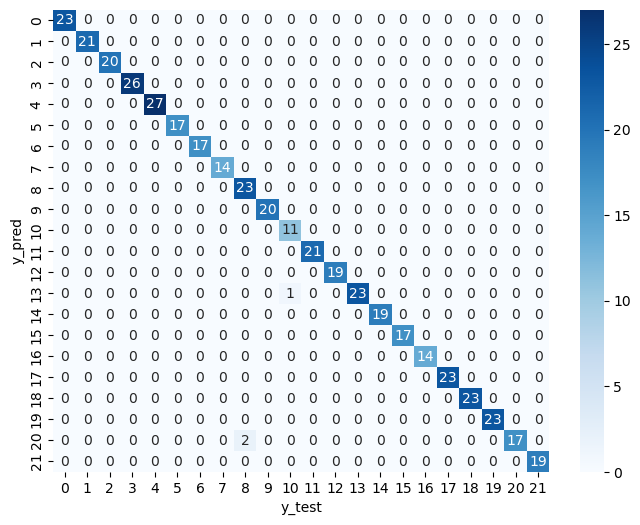

In [49]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("F1 Score for Random Forest Classifier",f1_score(y_test,y_pred,average='macro'))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

F1 Score for Support Vector Machine 0.9598559320728476


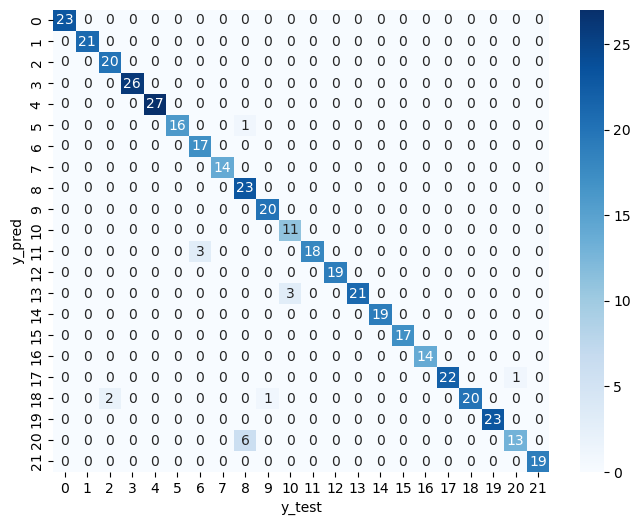

In [50]:
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("F1 Score for Support Vector Machine",f1_score(y_test,y_pred,average='macro'))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

F1 Score for LogisticRegression 0.9439795958107916


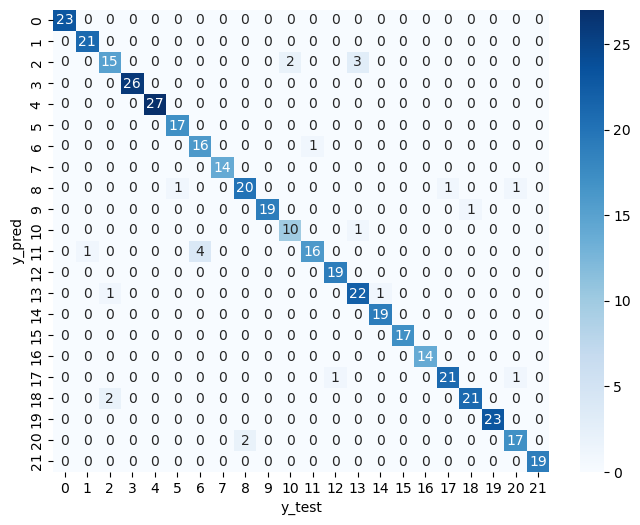

In [51]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("F1 Score for LogisticRegression",f1_score(y_test,y_pred,average='macro'))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

F1 Score for KNeighborsClassifier 0.9695327865360642


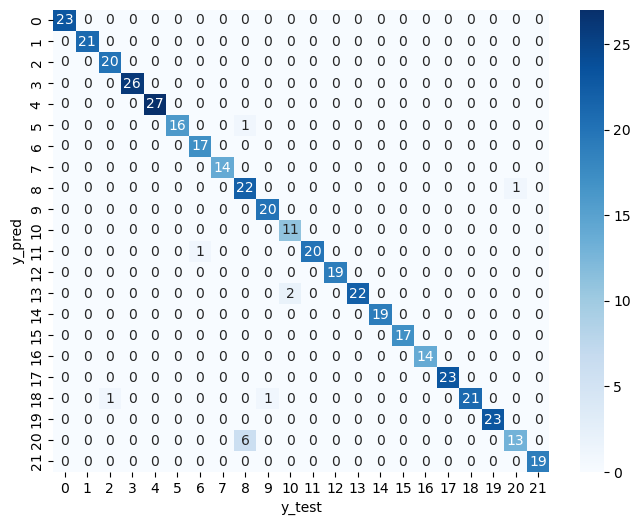

In [52]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("F1 Score for KNeighborsClassifier",f1_score(y_test,y_pred,average='macro'))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

F1 Score for GaussianNB 0.9955808080808081


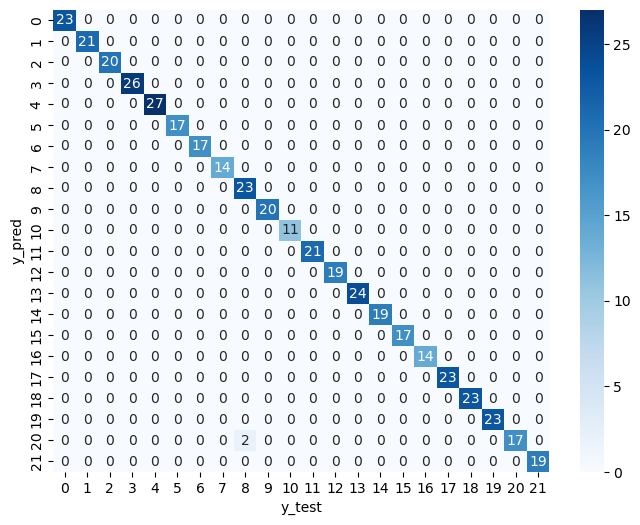

In [53]:
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("F1 Score for GaussianNB",f1_score(y_test,y_pred,average='macro'))
con_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

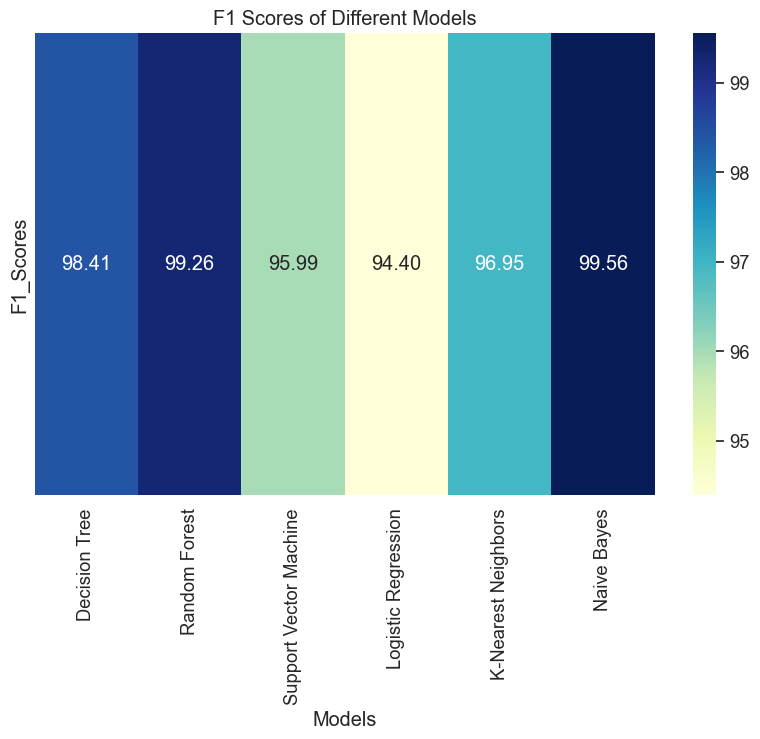

In [54]:
models = {
    'Decision Tree': DecisionTreeClassifier(), 
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
}
model_names = []
f1_scores = []
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    model_names.append(name)
    f1_scores.append(f1*100)
    
    
# plt.figure(figsize=(8, 6))
# ax = sns.barplot(x=f1_scores, y=model_names, palette='plasma')
# plt.xlabel('F1-Scores')
# plt.ylabel('Models')
# plt.title('Comparison of F1-Scores for Different Models')
# plt.show()

# Create a 2D array for the heatmap data
f1_Scores_data = np.array(f1_scores).reshape(1, -1)
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
sns.heatmap(f1_Scores_data, annot=True, cmap="YlGnBu", fmt=".2f", xticklabels=model_names, yticklabels=False)
plt.xlabel("Models")
plt.ylabel("F1_Scores")
plt.title("F1 Scores of Different Models")
plt.show()


In [55]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)
f1_score(y_test, y_pred, average='macro')

0.9955808080808081

In [56]:
def crop_recommend(N,P,K,temp,humid,ph,rain):
    features = np.array([[N,P,K,temp,humid,ph,rain]])
    prediction = nb.predict(features).reshape(1,-1)
    return prediction[0]

In [57]:
N = 90
P = 42
K = 43
temp = 21
humid = 82
ph =  6.5
rain = 203
predict = crop_recommend(N,P,K,temp,humid,ph,rain)
if predict[0] in crop_dict:
    predicted_crop = crop_dict[predict[0]]
    print(predicted_crop,"is the best crop for the cultivation")
else:
    print("Please Check all the values else Sorry we are not able to recommend the crop")

rice is the best crop for the cultivation


In [58]:
import pickle
pickle.dump(nb,open('model.pkl','wb')) #this pickle helps u to convert into the precompiled format

In [59]:
import sklearn
print(sklearn.__version__)

1.3.0
